#  Inverse Methods Homework 1: Problem 4
## Temperature Data

### Problem Statement
Polynomial regression seeks to fit data points $d_i$,

$$d_i = m_1 + m_2g_i^1 + ... + \hat{m}_n g_i^{(n−1)} + \epsilon_i$$

with the following model,

$$ \hat{d}_1 = \hat{m}_1 + \hat{m}_2 g_i^1 + ...+ \hat{m}_n g_i^{(n-1)} $$

In this example we will attempt to model the behavior of temperatures measured in a conducting rod,
$d_i$, as a function of changing the position, $g_i$, of a heat source. Temperature data is provided in a matrix <tt>d_data.txt</tt> accessible on the course web site. There are m rows of this matrix, which correspond
to observed temperatures at each of the m heat source positions, which ranged from positions $g_i$ of 2 to
50 in steps of size 3. The columns correspond to measurements from repeating the experiment on three
different days. 

### Deliverables
a) Plot the raw data and calculate a vector d of mean data points

b) Fit the man values of the data to a linear polynomial assuming that all mean values have the same
unknown error.

c) From the actual standard deviation for the data in each row ($\sigma_i$), calculate the data weight matrix **W** such that $W_{i,i}$ = 1/$\sigma_i$ for $i = 1, . . . , m$. For the sake of this assignment, you may assume thatthe data is uncorrelated (even if it isn’t).

d) Fit the data to a linear polynomial using the standard LS regression equations operating on error-weighted data with an error weighted design matrix (i.e., $\textbf{G}_w$ and $\textbf{d}_w$ in the text book).

e) Estimate the error in $\hat{\textbf{m}}$ from both the naive (part 2) and error-weighted (part 4) regressions.

f) Show on paper and demonstrate in your code that the error-weighted approach in equivalent to finding $\hat{\textbf{m}}$ the minmum of $\frac{1}{2}||\hat{\epsilon}||^2_2$ where $$ ||\hat{\epsilon}||_2^2 = (\textbf{G} \hat{\textbf{m}} - \textbf{d})^T\textbf{C}_d^{-1}(\textbf{G} \hat{\textbf{m}} - \textbf{d}) $$ and  also that the error covariance estimate is $$ \textbf{C}_{\hat{m}} = (\textbf{G}^T \textbf{C}_d^{-1} \textbf{G})^{-1} $$ where $\textbf{C}_d$ is a diagonal error covariance matrix for the data, which you can construct in MATLAB as <tt>diag(var(y_dat'))</tt>.

g) Repeat the native and error-weighted regression analysis for $n=3$. Of all four regressions thus far, discuss which you think is best.
h) Perform an error-weighted regression of a polynomial of order $m-1$ (i.e.,$n=17$) to the data. Is the behavior as you expect? Why or why not?

Parts a, b, c, and d:
The avearge vector, d, is: [881.48 775.46 509.22 304.36 535.54 365.17 273.27 228.12 148.55 134.62
  89.62  66.74 268.06  61.52  49.85  52.77  70.53]
dof:  15
Slope:  664.3682458605666
Intercept:  -14.659175217864926
Weighted Slope =  464.71206691846834
Weighted Intercept =  -9.86571181205338


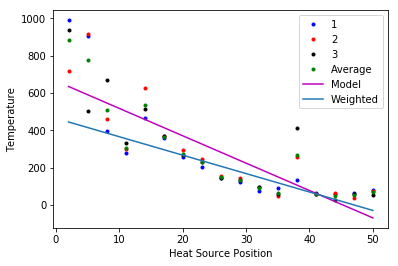

In [82]:
###### PARTS a, b, c AND d ############
print('Parts a, b, c, and d:')

# Import Packages
import requests
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import Data
F = 'http://spot.colorado.edu/~henzed/MCEN5228_f2017/hw/d_data.txt'
imp = requests.get(F).text

############# PART a ################
# Format Data
data = np.fromstring(imp, sep=' ')
data = data.reshape(17,3)
d1 = data[:,0]
d2 = data[:,1]
d3 = data[:,2]
g = np.arange(2.0,51,3)

# Avearge
d = (d1 + d2 + d3)/3
print('The avearge vector, d, is:',np.around(d,2))

# Plot Data
plt.plot(g, d1, 'b.')
plt.plot(g, d2, 'r.')
plt.plot(g, d3, 'k.')
plt.plot(g, d, 'g.')

############# PART b ################
# Linear Model
G = np.ones((len(d),2))
G[:,1] = g
dof = np.shape(G)[0] - np.shape(G)[1] # Degrees of Freedom
print('dof: ', dof)

# Linear Regression Model
m1,m0 = np.linalg.lstsq(G, d)[0]
print('Slope: ', m1)
print('Intercept: ', m0)
trend = np.polyval([m0, m1], g)
plt.plot(g, trend, 'm')

############# PART c ################
# Weighted Model
sig = np.std([d1, d2, d3], axis=0)
W = np.diag(1/sig) # ?????????????????????
W_Henze = np.diag(1./np.sqrt(np.diag(np.cov(data)))) # ??????????????????

############# PART d ################
Gw = np.matmul(W,G)
Gw_Henze = np.matmul(W_Henze,G)
dw = np.matmul(W,d)
mw1,mw0 = np.linalg.lstsq(Gw, dw)[0]
trendw = np.polyval([mw0,mw1], g)
plt.plot(g,trendw)
print('Weighted Slope = ', mw1)
print('Weighted Intercept = ', mw0)

plt.xlabel('Heat Source Position')
plt.ylabel('Temperature')
plt.legend(['1','2','3', 'Average','Model','Weighted'])
plt.show()


In [83]:
############# PART e ################
eps = np.matmul(trend-d,trend-d)
print('||eps||_2^2 = ', eps)
sig = eps/dof
print('sig^2 = ', sig)
GG = np.matmul(np.transpose(G),G)
Cm = sig*np.linalg.inv(np.matmul(np.transpose(G),G)) # Error covariance Matrix of m
ms = np.sqrt([[Cm[0,0]],[Cm[1,1]]])
print('The standard deviation in the regression coefficients are: ', ms[0], ms[1])

Cmw = np.linalg.inv(np.matmul(np.transpose(Gw_Henze),Gw_Henze))
msw = np.sqrt([[Cmw[0,0]],[Cmw[1,1]]])
print('The standard deviation in the weighted regression coefficients are: ', msw)



||eps||_2^2 =  262918.26383692643
sig^2 =  17527.884255795096
The standard deviation in the regression coefficients are:  [65.25230227] [2.18480868]
The standard deviation in the weighted regression coefficients are:  [[8.44203526]
 [0.25862036]]


In [84]:
############### Part f #################
import statistics
L = np.shape(data)[0]
Cd = np.zeros((L,L))
for i in range(0,L):
    Cd[i,i] = statistics.variance(data[i,:])
Cdinv = np.linalg.inv(Cd)
Cmhat = np.linalg.inv(np.matmul(G.T, np.matmul(Cdinv, G)))
mhat1 = np.linalg.inv(np.matmul(G.T, np.matmul(Cdinv,G)))
mhat2 = np.matmul(G.T, np.matmul(Cdinv, d))
mhat = np.matmul(mhat1,mhat2)
print(mhat)

[464.71206692  -9.86571181]


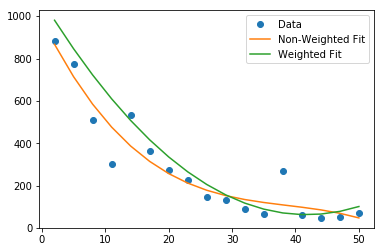

In [85]:
############ Part g ##################
coef3 = np.polyfit(g,d,3)
# coef3W = np.polyfit(g,dw,3)
Fit3 = np.polyval(coef3,g)
G3 = np.ones((len(g),4))
G3[:,1] = g
G3[:,2] = g**2
G3[:,3] = g**3
GW3 = np.matmul(W_Henze,G3)
m3 = np.linalg.lstsq(GW3, dw)[0]
Fit3W = np.polyval(np.flipud(m3),g)
plt.plot(g,d,'o')
plt.plot(g,Fit3)
plt.plot(g,Fit3W)
plt.legend(['Data','Non-Weighted Fit','Weighted Fit'])
plt.show()

(17, 17)
[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02
  2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04
  6.55360000e+04]
 [1.00000000e+00 5.00000000e+00 2.50000000e+01 1.25000000e+02
  6.25000000e+02 3.12500000e+03 1.56250000e+04 7.81250000e+04
  3.90625000e+05 1.95312500e+06 9.76562500e+06 4.88281250e+07
  2.44140625e+08 1.22070312e+09 6.10351562e+09 3.05175781e+10
  1.52587891e+11]
 [1.00000000e+00 8.00000000e+00 6.40000000e+01 5.12000000e+02
  4.09600000e+03 3.27680000e+04 2.62144000e+05 2.09715200e+06
  1.67772160e+07 1.34217728e+08 1.07374182e+09 8.58993459e+09
  6.87194767e+10 5.49755814e+11 4.39804651e+12 3.51843721e+13
  2.81474977e+14]
 [1.00000000e+00 1.10000000e+01 1.21000000e+02 1.33100000e+03
  1.46410000e+04 1.61051000e+05 1.77156100e+06 1.94871710e+07
  2.14358881e+08 2.35794769e+09 2.59374246e+10 2.85311671e+11
  3.138

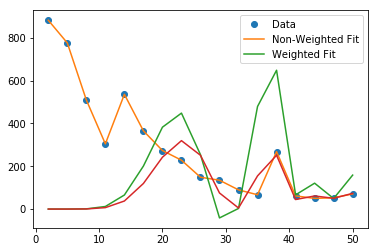

In [91]:
############# Part h ###################
coef16 = np.polyfit(g,d,16)
Fit16 = np.polyval(coef16,g)
order = 17

G16 = np.ones((len(g),order))
print(np.shape(G16))
for i in range(0,order):
    G16[:,i] = g**i
print(G16)
Mm = np.linalg.lstsq(G16,d)[0]
Fut16 = np.polyval(np.flipud(Mm),g)

GW16 = np.matmul(W_Henze,G16)
m16 = np.linalg.lstsq(GW16, dw)[0]
ra = np.linalg.lstsq(GW16, dw)[2]
print(ra)
Fit16W = np.matmul(G16,m16) #np.polyval(np.flipud(m16),g)
plt.plot(g,d,'o')
plt.plot(g,Fit16)
plt.plot(g,Fit16W)
plt.plot(g, Fut16)
plt.legend(['Data','Non-Weighted Fit','Weighted Fit'])
plt.show()